# FD - convergence study

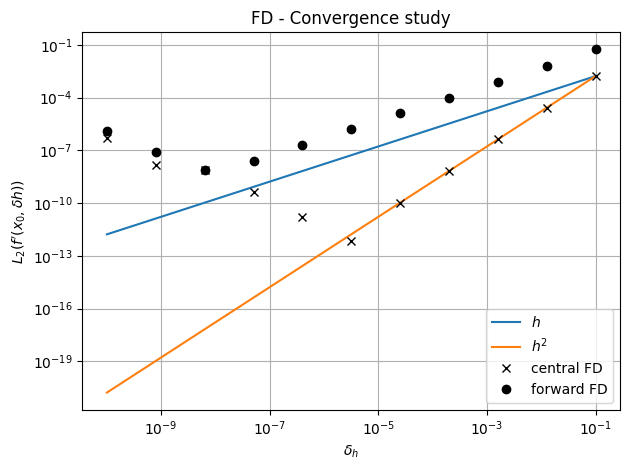

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Nov  4 16:19:48 2020

@author: ggruszczynski

"""

import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


def fun(x):
    return np.sin(x)


def f_prim_analytical(x):
    return np.cos(x)


def central_fd(f,x,h):
    f_prim = (f(x+h) - f(x-h))/(2*h)
    return f_prim
    
def forward_fd(f,x,h):
    f_prim = (f(x+h) - f(x))/h
    return f_prim

def backward_fd(f,x,h):
    f_prim = (f(x) - f(x-h))/h
    return f_prim

    
def calc_L2_per_element(anal, num):
    return np.sqrt((anal - num) * (anal - num) / (anal * anal)) 
    #return  np.max(np.abs(anal - num))
    

    
x0 = np.pi/4.

dh = np.logspace(-10, -1, 11)
# dh2 = np.linspace(1e-6, 1e-2, 100)
f_prim_exact = f_prim_analytical(x0)
f_prim_exact = np.full(len(dh), f_prim_exact)




f_prim_central_fd = central_fd(fun, x0, dh)
rel_error_central_fd = calc_L2_per_element(f_prim_central_fd, f_prim_exact)

f_prim_forward_fd = forward_fd(fun, x0, dh)
rel_error_forward_fd = calc_L2_per_element(f_prim_forward_fd, f_prim_exact)

f_prim_backward_fd = backward_fd(fun, x0, dh)
rel_error_backard_fd = calc_L2_per_element(f_prim_backward_fd, f_prim_exact)


##########################
plot_dir = f'moje_wykresy'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
    
fig_name = os.path.join(plot_dir, f"calc_derivative_with_fd.png")
# # plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots()



y = dh**1
y = y / y[-1] * rel_error_central_fd[-1]
ax.loglog(dh,y, label=r'${h}$')

y = dh**2
y = y / y[-1] * rel_error_central_fd[-1]
ax.loglog(dh,y, label=r'${h^2}$')


ax.loglog(dh, rel_error_central_fd, linestyle="", color='black', marker='x', label=r'central FD')
ax.loglog(dh, rel_error_forward_fd, linestyle="", color='black', marker='o', label=r'forward FD')
# ax.loglog(dh, rel_error_backard_fd, linestyle="", color='black', marker='v', label=r'backward FD')



ax.set(xlabel=r'$\delta_h$', ylabel=r'$L_2(f^{\prime}(x_0, \delta h))$')
ax.set(title='FD - Convergence study')
ax.legend()
ax.grid()

fig.tight_layout()
plt.pause(1e-9)  # there is a race condition somewhere in the matplotlib code.
fig.savefig(fig_name, bbox_inches='tight', dpi=200)
plt.show()
plt.close(fig)  # close the figure


# The condition Number

In [2]:
import numpy as np
from numpy import linalg as LA

def dot_product(u,v):
    return u @ v

def calc_condition_number_naive(f, u, v, delta):
    cond_number = LA.norm(f(u+delta, v) - f(u,v)) / LA.norm(f(u,v))
    cond_number /= LA.norm(delta)/LA.norm(u)
    return cond_number


x0 = np.array([1, 2, 3])
x1 = np.array([2, 6, -5])

### case 1

In [3]:
dx = 0.02 * x0
# dx = np.array([0.02, 0.04, -0.04])
c = calc_condition_number_naive(dot_product, x0, x1, dx)
print(f"condition number: {c}")
print(f"result: {dot_product(x0,x1)}")
print(f"result (disturbed): {dot_product(x0+dx,x1)}")


# calculate the ratio
# print(  ((x0 + dx) @ x1) / (x0 @ x1) )
# the closer the condition number to 1 the better

condition number: 0.9999999999999787
result: -1
result (disturbed): -1.0199999999999996


### case 2

In [4]:
dx = np.array([0.02, 0.04, -0.04])
c = calc_condition_number_naive(dot_product, x0, x1, dx)
print(f"condition number: {c}")
print(f"result: {dot_product(x0,x1)}")
print(f"result (disturbed): {dot_product(x0+dx,x1)}")

# calculate the ratio
# print(  ((x0 + dx) @ x1) / (x0 @ x1) )

condition number: 29.933259094191563
result: -1
result (disturbed): -0.5199999999999996
